In [4]:
from SpecReduction import SpecFunctions as sf
import numpy as np
import pandas as pd
import scipy
import scipy.optimize as opt
from scipy.optimize import curve_fit
import specreduce
from specreduce import WavelengthCalibration1D as wav_cal
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
from aquarel import load_theme

In [5]:
theme = load_theme('arctic_dark')
theme.apply()

In [6]:
#median of bias frames stack
bias_path = f'Lab_day_080525/Bias_85/2025-08-05_18_26_19Z/2025-08-05-1826_3-CapObj_'
bias_shape = fits.open(f'Lab_day_080525/Bias_85/2025-08-05_18_26_19Z/2025-08-05-1826_3-CapObj_0026.FIT')[0].data.shape
bias_avg = sf.median_img(100, bias_path, bias_shape[0], bias_shape[1])

# plt.figure(figsize = (12,12))
# plt.imshow(bias_avg)
# plt.title('Bias Stack Average')
# plt.xlabel('Pixels')
# plt.ylabel('Pixels')
# plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
# plt.show()

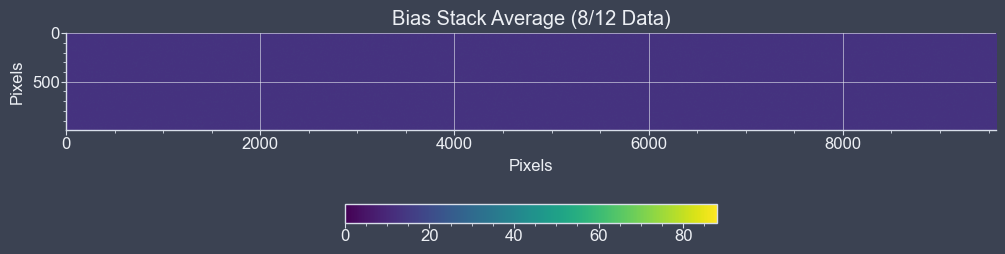

In [4]:
#median of bias frames stack - 8/12 data
bias_path_new = f'LabDay81225/Bias812/2025-08-12_18_30_02Z/2025-08-12-1830_0-CapObj_'
bias_shape_new = fits.open(f'LabDay81225/Bias812/2025-08-12_18_30_02Z/2025-08-12-1830_0-CapObj_0006.FIT')[0].data.shape
bias_avg_new = sf.median_img(10, bias_path_new, bias_shape_new[0], bias_shape_new[1])

plt.figure(figsize = (12,12))
plt.imshow(bias_avg_new)
plt.title('Bias Stack Average (8/12 Data)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()

In [7]:
#median of ThAr lights stack
ThAr_lights_path = f'Lab_day_080525/ThAr001_lights/2025-08-05_18_04_33Z/2025-08-05-1804_5-CapObj_'
ThAr_lights_shape = fits.open(f'Lab_day_080525/ThAr001_lights/2025-08-05_18_04_33Z/2025-08-05-1804_5-CapObj_0016.FIT')[0].data.shape
ThAr_lights_avg = sf.median_img(100, ThAr_lights_path, ThAr_lights_shape[0], ThAr_lights_shape[1])

ThAr_lights_avg = ThAr_lights_avg - bias_avg

# plt.figure(figsize = (12,12))
# plt.imshow(ThAr_lights_avg, norm = 'log')
# plt.title('ThAr Lights Stack Average')
# plt.xlabel('Pixels')
# plt.ylabel('Pixels')
# plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
# plt.show()

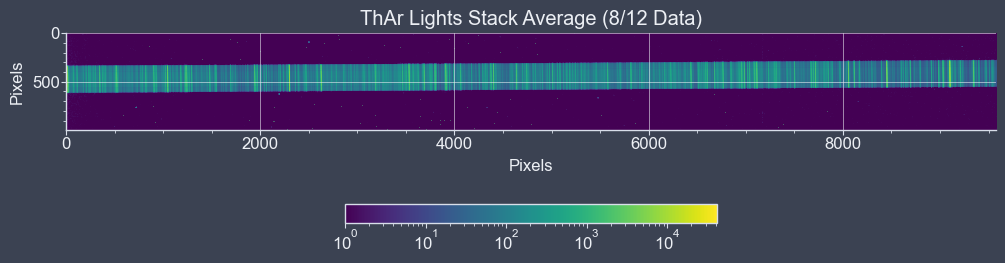

In [6]:
#median of ThAr lights stack (8/12 Data)
ThAr_lights_path_new = f'LabDay81225/ThAr_001_lights_812/2025-08-12_18_18_01Z/2025-08-12-1818_0-CapObj_'
ThAr_lights_shape_new = fits.open(f'LabDay81225/ThAr_001_lights_812/2025-08-12_18_18_01Z/2025-08-12-1818_0-CapObj_0083.FIT')[0].data.shape
ThAr_lights_avg_new = sf.median_img(10, ThAr_lights_path_new, ThAr_lights_shape_new[0], ThAr_lights_shape_new[1])

ThAr_lights_avg_new = ThAr_lights_avg_new - bias_avg_new

plt.figure(figsize = (12,12))
plt.imshow(ThAr_lights_avg_new, norm = 'log')
plt.title('ThAr Lights Stack Average (8/12 Data)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()

In [8]:
#median of ThAr darks stack
ThAr_darks_path = f'Lab_day_080525/ThAr001_darks/2025-08-05_18_12_49Z/2025-08-05-1812_8-CapObj_'
ThAr_darks_shape = fits.open(f'Lab_day_080525/ThAr001_darks/2025-08-05_18_12_49Z/2025-08-05-1812_8-CapObj_0072.FIT')[0].data.shape
ThAr_darks_avg = sf.median_img(100, ThAr_darks_path, ThAr_darks_shape[0], ThAr_darks_shape[1])

ThAr_darks_avg = ThAr_darks_avg - bias_avg

# plt.figure(figsize = (12,12))
# plt.imshow(ThAr_darks_avg)
# plt.title('ThAr Darks Stack Average')
# plt.xlabel('Pixels')
# plt.ylabel('Pixels')
# plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
# plt.show()

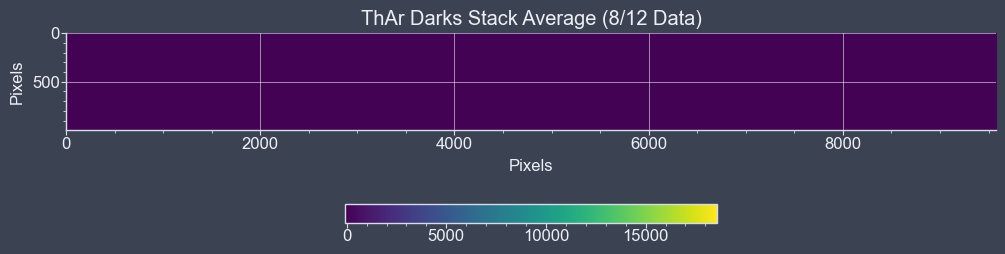

In [8]:
#median of ThAr darks stack (8/12 Data)
ThAr_darks_path_new = f'LabDay81225/ThAr_001_darks_812/2025-08-12_18_24_18Z/2025-08-12-1824_3-CapObj_'
ThAr_darks_shape_new = fits.open(f'LabDay81225/ThAr_001_darks_812/2025-08-12_18_24_18Z/2025-08-12-1824_3-CapObj_0092.FIT')[0].data.shape
ThAr_darks_avg_new = sf.median_img(10, ThAr_darks_path_new, ThAr_darks_shape_new[0], ThAr_darks_shape_new[1])

ThAr_darks_avg_new = ThAr_darks_avg_new - bias_avg_new

plt.figure(figsize = (12,12))
plt.imshow(ThAr_darks_avg_new)
plt.title('ThAr Darks Stack Average (8/12 Data)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()

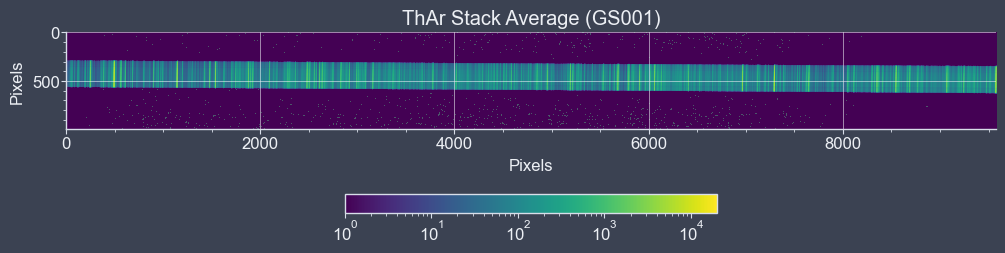

In [9]:
ThAr_subtracted = ThAr_lights_avg - ThAr_darks_avg
ThAr_flipped = np.fliplr(ThAr_subtracted)
ThAr02_85_hdul = fits.PrimaryHDU(ThAr_flipped)
ThAr02_85_hdul.writeto('FITS_shortcut/ThAr85_01_flipped.fits', overwrite = True)

plt.figure(figsize = (12,12))
plt.imshow(ThAr_flipped, norm = 'log', vmin = 1, vmax = 10**4.3)
plt.title('ThAr Stack Average (GS001)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.07, norm = 'log')

# plt.savefig('GS001_img.png')
plt.show()

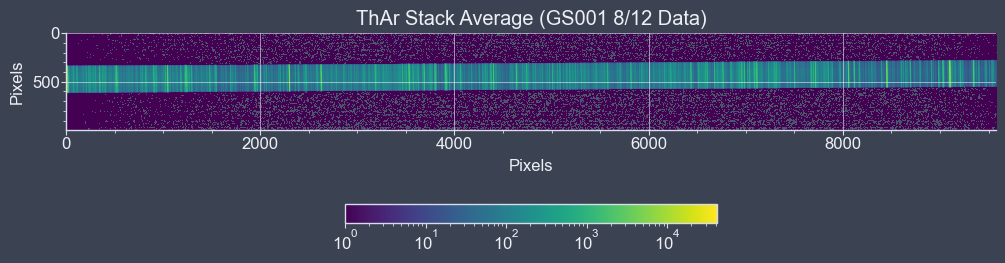

In [10]:
ThAr_subtracted_new = ThAr_lights_avg_new - ThAr_darks_avg_new


plt.figure(figsize = (12,12))
plt.imshow(ThAr_subtracted_new, norm = 'log')
plt.title('ThAr Stack Average (GS001 8/12 Data)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08, norm = 'log')
plt.show()

(1.0, 7285, 0.7876269934901249, 495)
0.8437649124987647


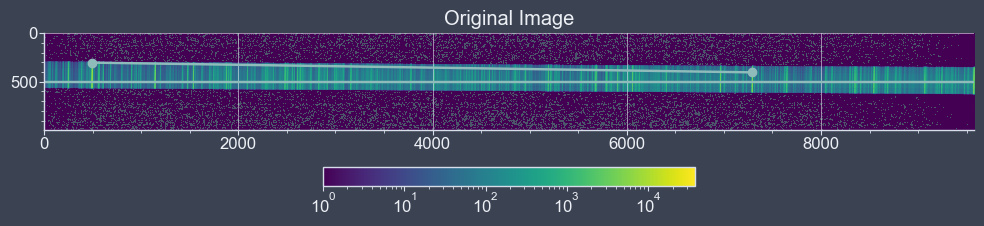

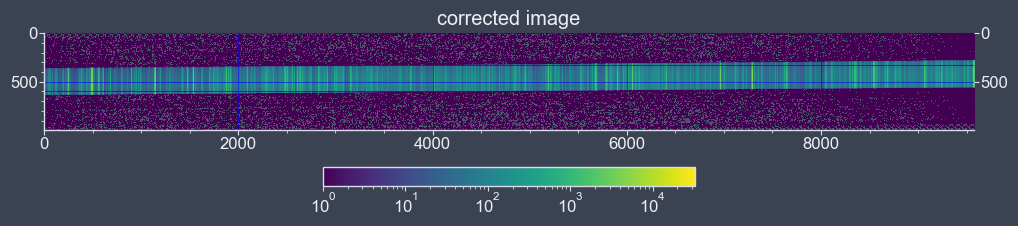

In [98]:
ThAr_corrected = sf.straight_spec(ThAr_flipped)

(1.0, 7285, 0.9216048282615485, 495)
-0.4725317977744817


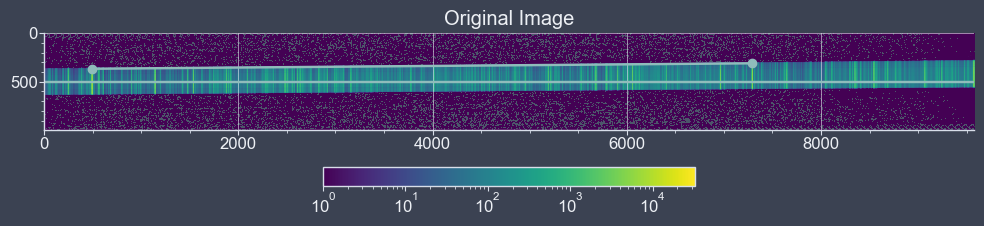

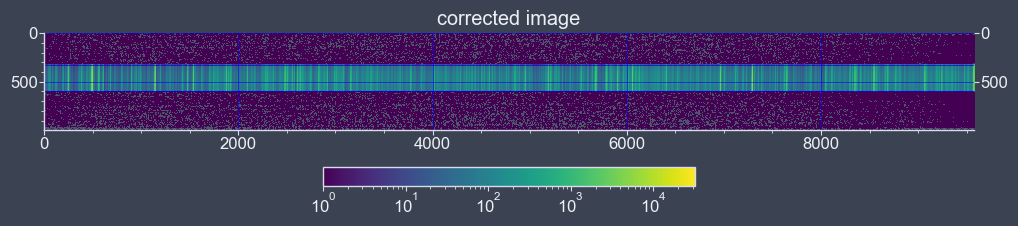

In [99]:
ThAr_corrected = sf.straight_spec(ThAr_corrected)

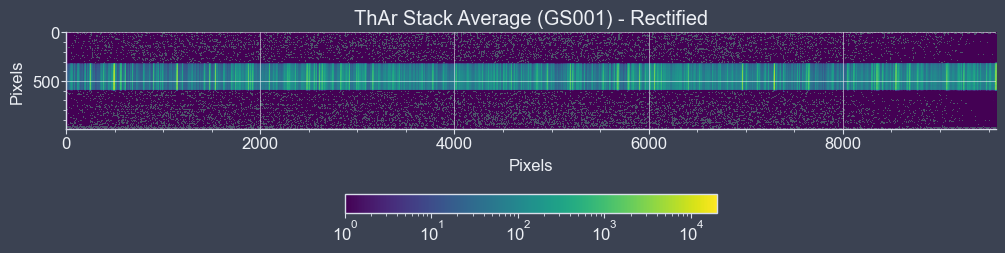

In [103]:
plt.figure(figsize = (12,12))
plt.imshow(ThAr_corrected, norm = 'log', vmin = 1, vmax = 10**4.3)
plt.title('ThAr Stack Average (GS001) - Rectified')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.07, norm = 'log')

plt.savefig('GS001_tilt_img.png')
plt.show()

(1.0, 2298, 0.8109045207350885, 9092)
-0.3879254614071526


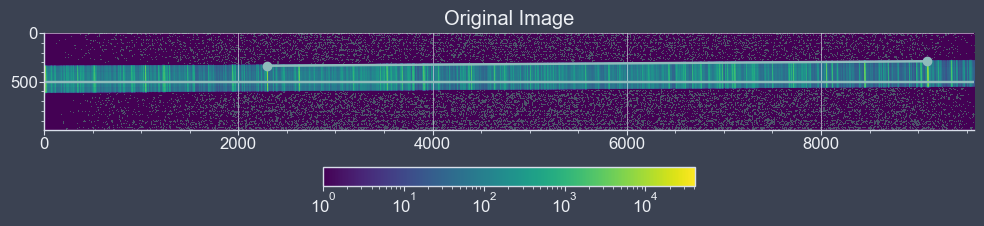

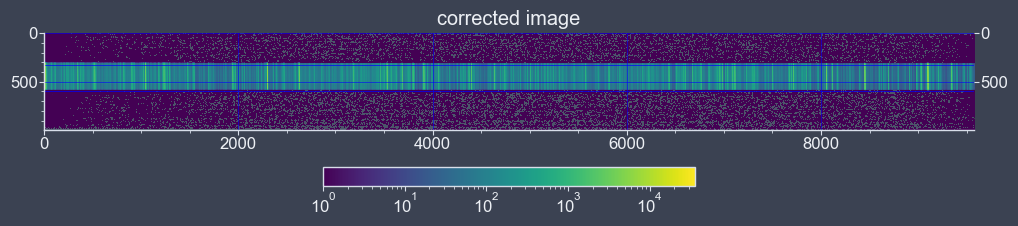

In [13]:
ThAr_corrected_new = sf.straight_spec(ThAr_subtracted_new)

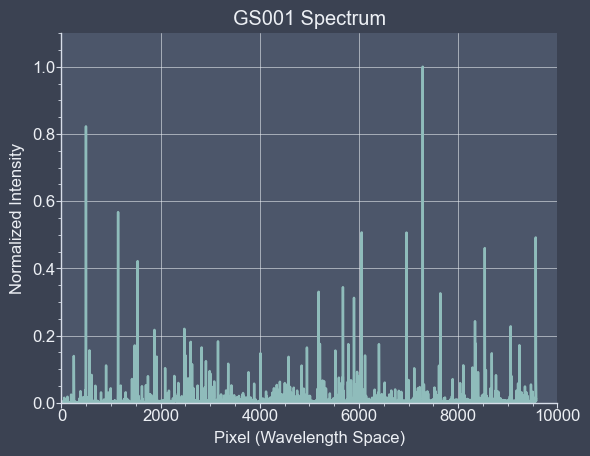

In [105]:
ThAr_spec = sf.make1D(ThAr_corrected, False)
plt.plot(ThAr_spec)
plt.title('GS001 Spectrum')
plt.ylabel('Normalized Intensity') #percentage of total intensity in each peak
plt.xlabel('Pixel (Wavelength Space)')
plt.xlim(0,10000)
plt.ylim(0, 1.1)
plt.savefig('GS001_spec_1D.png')
plt.show()

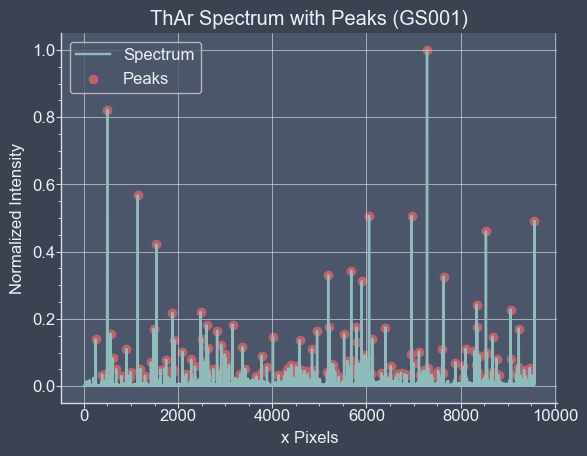

In [107]:
ThAr_peak_locs, ThAr_peak_vals, ThAr_fw, ThAr_fwhm = sf.find_peaks(ThAr_spec)


plt.plot(figsize = (6,4))
plt.title('ThAr Spectrum with Peaks (GS001)')
plt.plot(ThAr_spec, label = 'Spectrum')
plt.scatter(ThAr_peak_locs, ThAr_peak_vals, color = '#bf616a', label = 'Peaks')
plt.legend()
plt.ylabel('Normalized Intensity')
plt.xlabel('x Pixels')
plt.show()

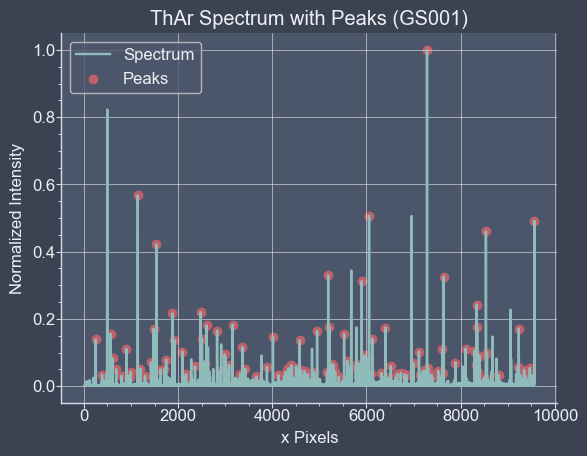

In [108]:
ThAr_peak_props = np.array([ThAr_peak_locs, ThAr_peak_vals, ThAr_fw, ThAr_fwhm])
ThAr_peak_locs_clean, ThAr_peak_vals_clean, ThAr_fw_clean, ThAr_fwhm_clean = sf.clean_peaks(ThAr_peak_props)


plt.plot(figsize = (6,4))
plt.title('ThAr Spectrum with Peaks (GS001)')
plt.plot(ThAr_spec, label = 'Spectrum')
plt.scatter(ThAr_peak_locs_clean, ThAr_peak_vals_clean, color = '#bf616a', label = 'Peaks')
plt.legend()
plt.ylabel('Normalized Intensity')
plt.xlabel('x Pixels')

plt.show()

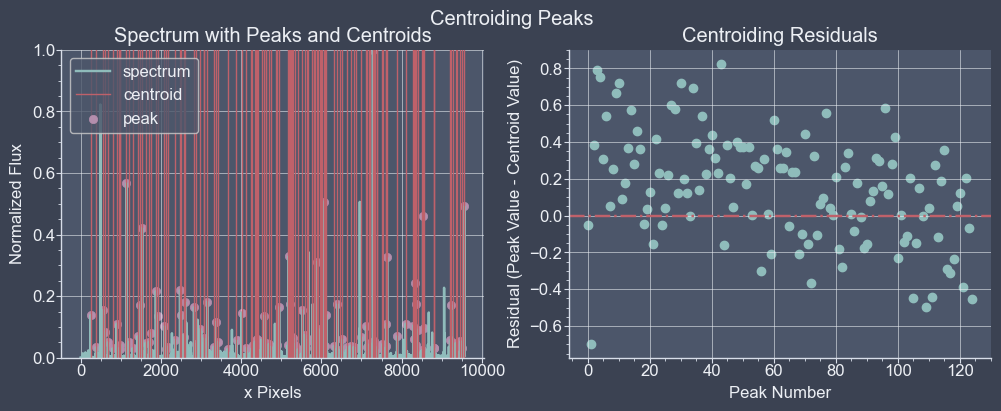

In [110]:
ThAr_peak_props_clean = np.array([ThAr_peak_locs_clean, ThAr_peak_vals_clean, ThAr_fw_clean, ThAr_fwhm_clean])

ThAr_pix = np.linspace(0, ThAr_spec.size - 1, ThAr_spec.size)
ThAr_centers, ThAr_res = sf.centroid(ThAr_spec, ThAr_pix, ThAr_peak_props_clean)
# plt.savefig('GS001_ThAr_centroid.png')
plt.show()

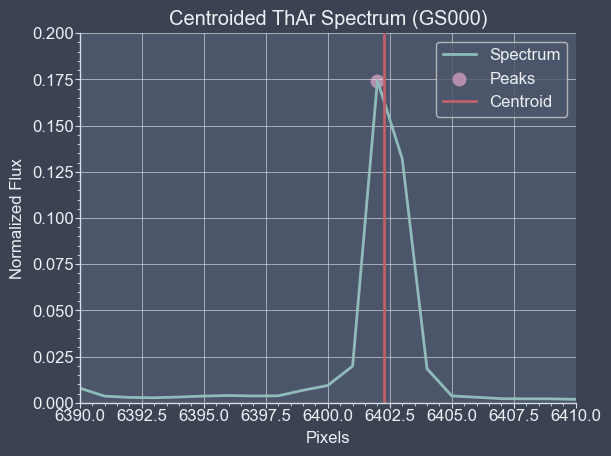

In [126]:
plt.plot(ThAr_spec, label = 'Spectrum', lw = 2)
plt.scatter(ThAr_peak_locs_clean, ThAr_peak_vals_clean, c = '#b48ead', label = 'Peaks', lw = 4)
for x in range(ThAr_centers.size - 1):
    plt.axvline(ThAr_centers[x], color = '#bf616a', lw = 2) #centroid
plt.axvline(ThAr_centers[ThAr_centers.size - 1], color = '#bf616a', lw = 2, label = 'Centroid')
plt.legend()
plt.title('Centroided ThAr Spectrum (GS000)')
plt.xlabel('Pixels')
plt.ylabel('Normalized Flux')
plt.xlim(6390, 6410)
plt.ylim(0, 0.2)
# plt.savefig('GS001_ThAr_centroid_zoom.png')
plt.show()

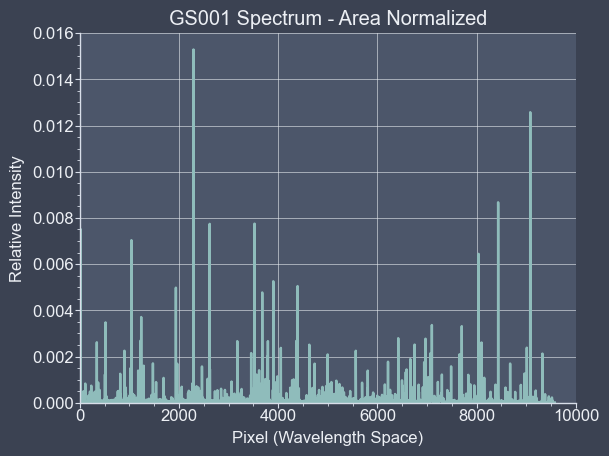

In [14]:
ThAr_spec_norm = sf.make1D(ThAr_corrected)
plt.plot(ThAr_spec_norm)
plt.title('GS001 Spectrum - Area Normalized')
plt.ylabel('Relative Intensity') #percentage of total intensity in each peak
plt.xlabel('Pixel (Wavelength Space)')
plt.xlim(0,10000)
plt.ylim(0, .016)
plt.show()

ThAr_pix = np.linspace(0, ThAr_spec_norm.size - 1, ThAr_spec_norm.size)

GS001_data = {'pixel': ThAr_pix, 'intensity': ThAr_spec_norm}
GS001_df = pd.DataFrame(GS001_data)
GS001_df.to_csv('GS001.csv', index=False)

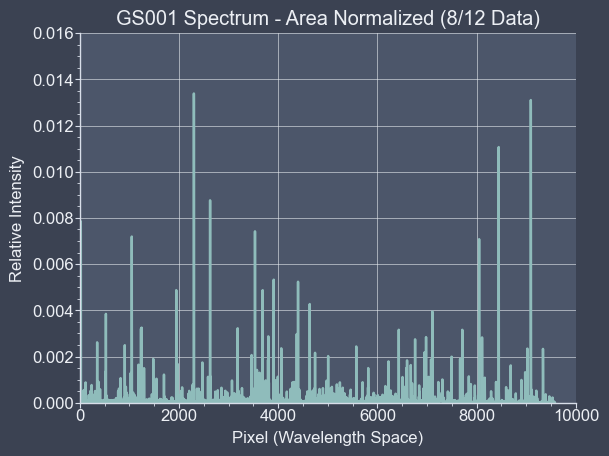

In [15]:
ThAr_spec_norm_new = sf.make1D(ThAr_corrected_new)
plt.plot(ThAr_spec_norm_new)
plt.title('GS001 Spectrum - Area Normalized (8/12 Data)')
plt.ylabel('Relative Intensity') #percentage of total intensity in each peak
plt.xlabel('Pixel (Wavelength Space)')
plt.xlim(0,10000)
plt.ylim(0, .016)
plt.show()

ThAr_pix_new = np.linspace(0, ThAr_spec_norm_new.size - 1, ThAr_spec_norm_new.size)

GS001_data_new = {'pixel': ThAr_pix_new, 'intensity': ThAr_spec_norm_new}
GS001_df_new = pd.DataFrame(GS001_data_new)
GS001_df_new.to_csv('GS001_812.csv', index=False)

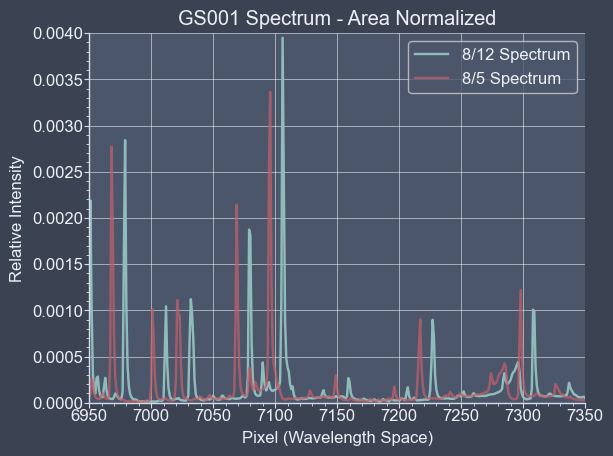

In [16]:
plt.plot(ThAr_spec_norm_new, label = '8/12 Spectrum')
plt.plot(ThAr_spec_norm, label = '8/5 Spectrum', alpha = 0.75)
plt.title('GS001 Spectrum - Area Normalized')
plt.ylabel('Relative Intensity') #percentage of total intensity in each peak
plt.xlabel('Pixel (Wavelength Space)')
plt.xlim(6950,7350)
plt.ylim(0, .004)
plt.legend()
plt.show()

-9


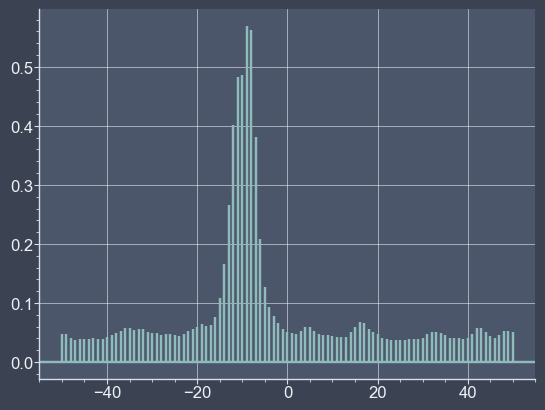

In [83]:
ThAr_lag = plt.xcorr(ThAr_spec_norm, ThAr_spec_norm_new, maxlags = 50)

for x in range(len(ThAr_lag[1])):
    if ThAr_lag[1][x] == max(ThAr_lag[1]):
        max_index = x
        
ThAr_offset = ThAr_lag[0][max_index]
print(ThAr_offset)

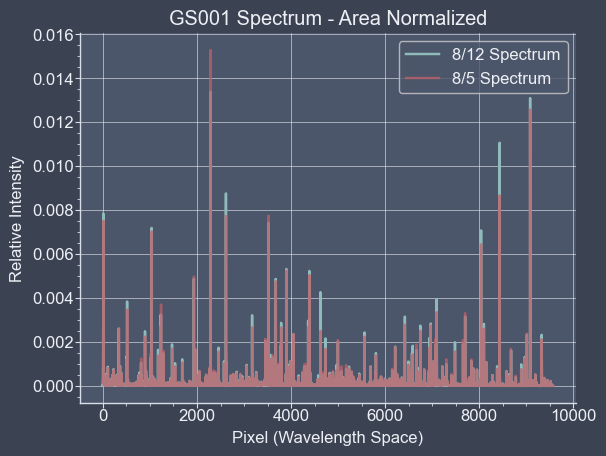

In [84]:

ThAr_pix_new = ThAr_pix - 10

plt.plot(ThAr_pix_new, ThAr_spec_norm_new, label = '8/12 Spectrum')
plt.plot(ThAr_pix, ThAr_spec_norm, label = '8/5 Spectrum', alpha = 0.75)
plt.title('GS001 Spectrum - Area Normalized')
plt.ylabel('Relative Intensity') #percentage of total intensity in each peak
plt.xlabel('Pixel (Wavelength Space)')
# plt.xlim(7050,7100)
# plt.ylim(0, .004)
plt.legend()
plt.show()

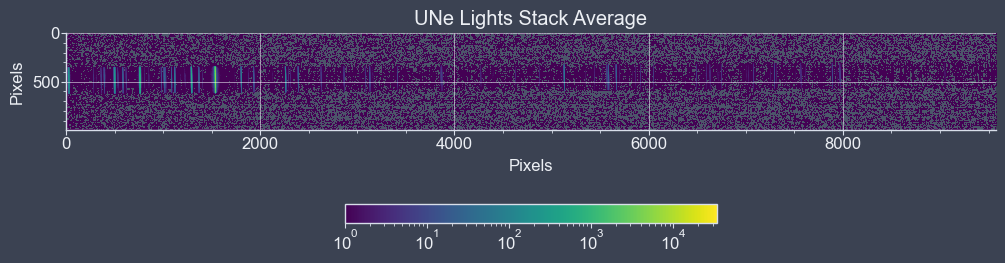

In [17]:
#median of UNe lights stack
UNe_lights_path = f'Lab_day_080525/UNe_001_lights/2025-08-05_18_22_04Z/2025-08-05-1822_0-CapObj_'
UNe_lights_shape = fits.open(f'Lab_day_080525/UNe_001_lights/2025-08-05_18_22_04Z/2025-08-05-1822_0-CapObj_0042.FIT')[0].data.shape
UNe_lights_avg = sf.median_img(10, UNe_lights_path, UNe_lights_shape[0], UNe_lights_shape[1])

UNe_lights_avg = UNe_lights_avg - bias_avg

plt.figure(figsize = (12,12))
plt.imshow(UNe_lights_avg, norm = 'log')
plt.title('UNe Lights Stack Average')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()

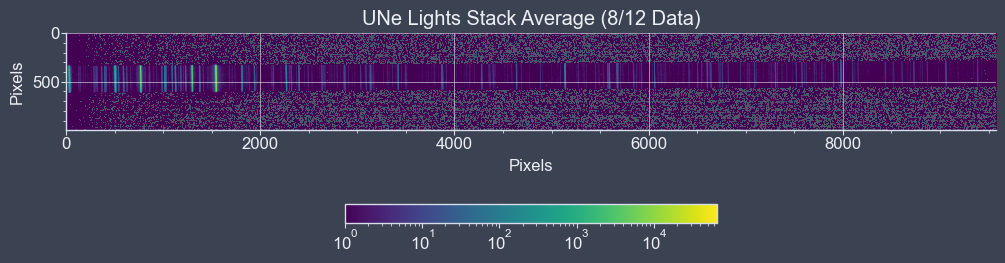

In [18]:
#median of UNe lights stack (8/12)
UNe_lights_path_new = f'LabDay81225/UNe_001_lights_812/2025-08-12_18_31_36Z/2025-08-12-1831_6-CapObj_'
UNe_lights_shape_new = fits.open(f'LabDay81225/UNe_001_lights_812/2025-08-12_18_31_36Z/2025-08-12-1831_6-CapObj_0006.FIT')[0].data.shape
UNe_lights_avg_new = sf.median_img(10, UNe_lights_path_new, UNe_lights_shape_new[0], UNe_lights_shape_new[1])

UNe_lights_avg_new = UNe_lights_avg_new - bias_avg_new

plt.figure(figsize = (12,12))
plt.imshow(UNe_lights_avg_new, norm = 'log')
plt.title('UNe Lights Stack Average (8/12 Data)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()

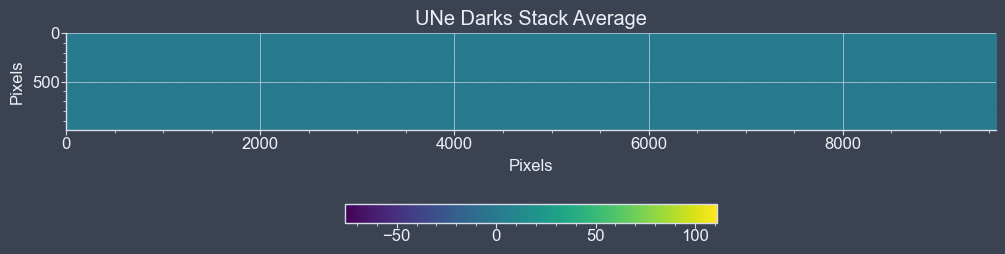

In [19]:
#median of UNe darks stack
UNe_darks_path = f'Lab_day_080525/Une_001_darks/2025-08-05_18_25_00Z/2025-08-05-1825_0-CapObj_'
UNe_darks_shape = fits.open(f'Lab_day_080525/Une_001_darks/2025-08-05_18_25_00Z/2025-08-05-1825_0-CapObj_0064.FIT')[0].data.shape
UNe_darks_avg = sf.median_img(10, UNe_darks_path, UNe_darks_shape[0], UNe_darks_shape[1])

UNe_darks_avg = UNe_darks_avg - bias_avg

plt.figure(figsize = (12,12))
plt.imshow(UNe_darks_avg)
plt.title('UNe Darks Stack Average')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()

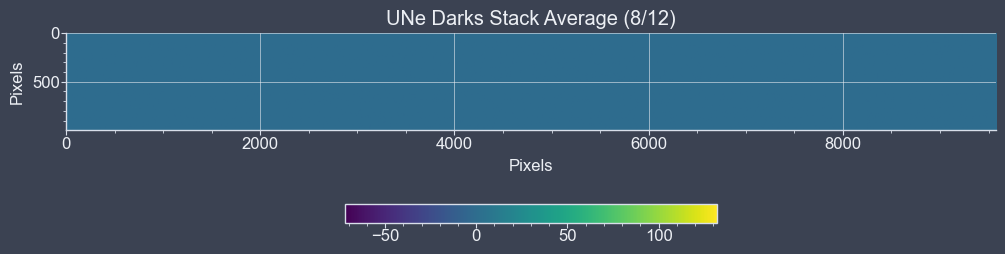

In [20]:
#median of UNe darks stack (8/12)
UNe_darks_path_new = f'LabDay81225/UNe_001_darks_812/2025-08-12_18_32_44Z/2025-08-12-1832_7-CapObj_'
UNe_darks_shape_new = fits.open(f'LabDay81225/UNe_001_darks_812/2025-08-12_18_32_44Z/2025-08-12-1832_7-CapObj_0002.FIT')[0].data.shape
UNe_darks_avg_new = sf.median_img(10, UNe_darks_path_new, UNe_darks_shape_new[0], UNe_darks_shape_new[1])

UNe_darks_avg_new = UNe_darks_avg_new - bias_avg_new

plt.figure(figsize = (12,12))
plt.imshow(UNe_darks_avg_new)
plt.title('UNe Darks Stack Average (8/12)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08)
plt.show()

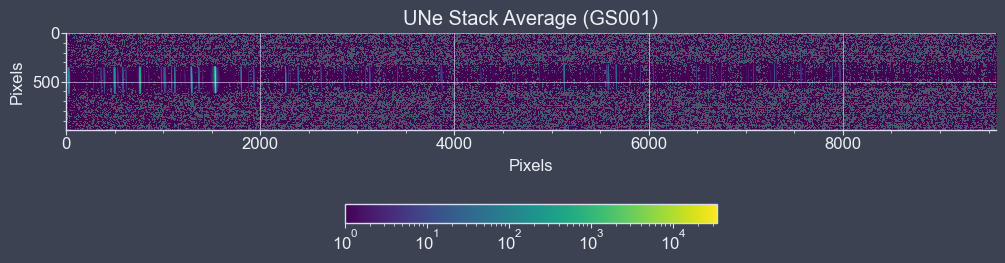

In [21]:
UNe_subtracted = UNe_lights_avg - UNe_darks_avg

plt.figure(figsize = (12,12))
plt.imshow(UNe_subtracted, norm = 'log')
plt.title('UNe Stack Average (GS001)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08, norm = 'log')
plt.show()

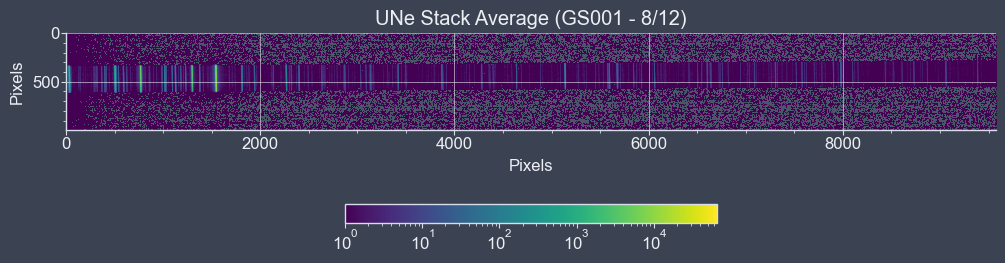

In [22]:
UNe_subtracted_new = UNe_lights_avg_new - UNe_darks_avg_new

plt.figure(figsize = (12,12))
plt.imshow(UNe_subtracted_new, norm = 'log')
plt.title('UNe Stack Average (GS001 - 8/12)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(shrink = 0.4, location = 'bottom', pad = 0.08, norm = 'log')
plt.show()

(1.0, 1536, 0.2114337668062596, 762)
-0.2960995836688005


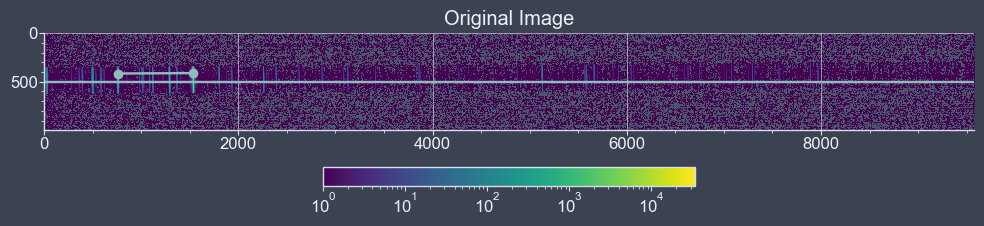

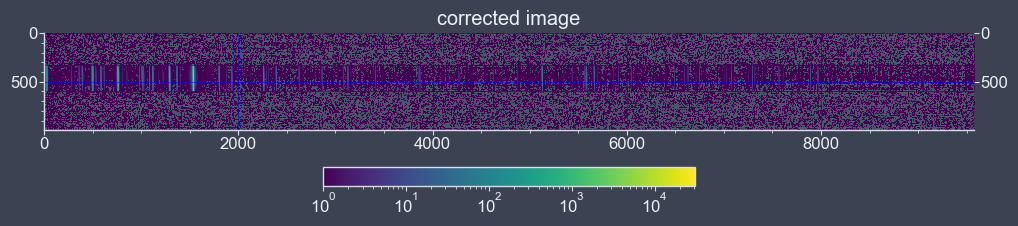

In [23]:
UNe_corrected = sf.straight_spec(UNe_subtracted)

(1.0, 1544, 0.31150310375644924, 770)
0.07402551373776525


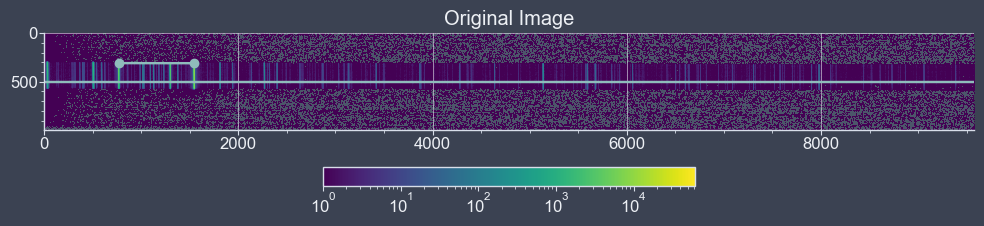

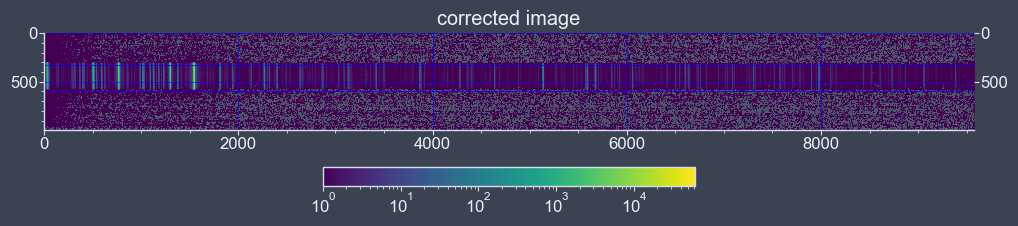

In [30]:
from skimage.transform import rotate
UNe_corrected_new = rotate(UNe_subtracted_new, -0.5)
UNe_corrected_new = sf.straight_spec(UNe_corrected_new)

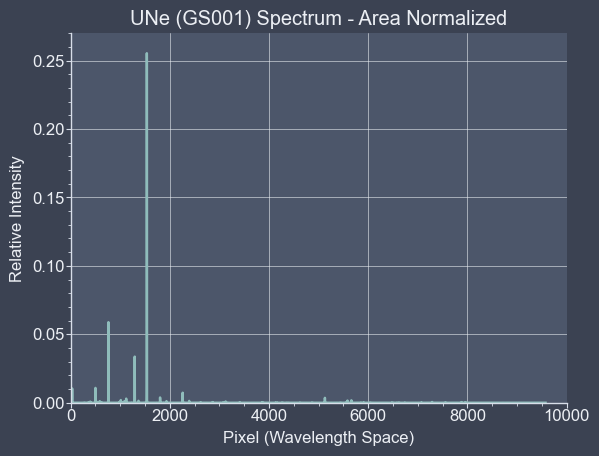

In [35]:
UNe_spec_norm = sf.make1D(UNe_corrected)
plt.plot(UNe_spec_norm)
plt.title('UNe (GS001) Spectrum - Area Normalized')
plt.ylabel('Relative Intensity') #percentage of total intensity in each peak
plt.xlabel('Pixel (Wavelength Space)')
plt.xlim(0,10000)
plt.ylim(0, .27)
plt.show()

UNe_pix = np.linspace(0, UNe_spec_norm.size - 1, UNe_spec_norm.size)

UNe_GS001_data = {'pixel': UNe_pix, 'intensity': UNe_spec_norm}
UNe_GS001_df = pd.DataFrame(UNe_GS001_data)
UNe_GS001_df.to_csv('UNe_GS001.csv', index=False)

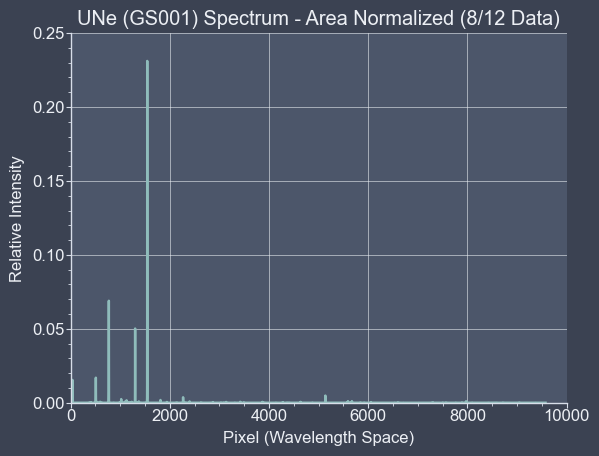

In [38]:
UNe_spec_norm_new = sf.make1D(UNe_corrected_new)
plt.plot(UNe_spec_norm_new)
plt.title('UNe (GS001) Spectrum - Area Normalized (8/12 Data)')
plt.ylabel('Relative Intensity') #percentage of total intensity in each peak
plt.xlabel('Pixel (Wavelength Space)')
plt.xlim(0,10000)
plt.ylim(0, .25)
plt.show()

UNe_pix_new = np.linspace(0, UNe_spec_norm_new.size - 1, UNe_spec_norm_new.size)

UNe_GS001_data_new = {'pixel': UNe_pix_new, 'intensity': UNe_spec_norm_new}
UNe_GS001_df_new = pd.DataFrame(UNe_GS001_data_new)
UNe_GS001_df_new.to_csv('UNe_GS001_812.csv', index=False)

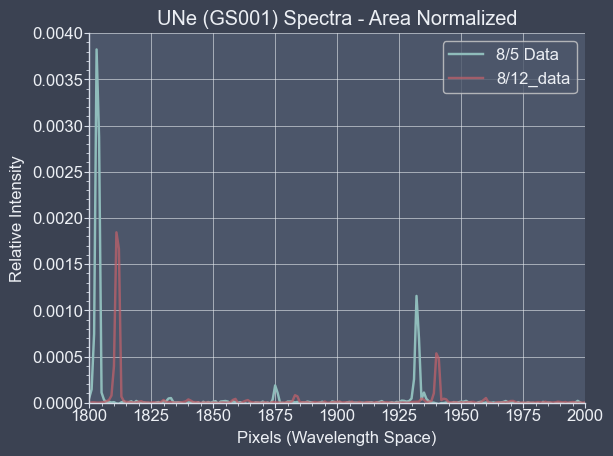

In [44]:
plt.plot(UNe_spec_norm, label = '8/5 Data')
plt.plot(UNe_spec_norm_new, label = '8/12_data', alpha = 0.75)
plt.title('UNe (GS001) Spectra - Area Normalized')
plt.xlabel('Pixels (Wavelength Space)')
plt.xlim(1800, 2000)
plt.ylabel('Relative Intensity')
plt.ylim(0,0.004)
plt.legend()
plt.show()

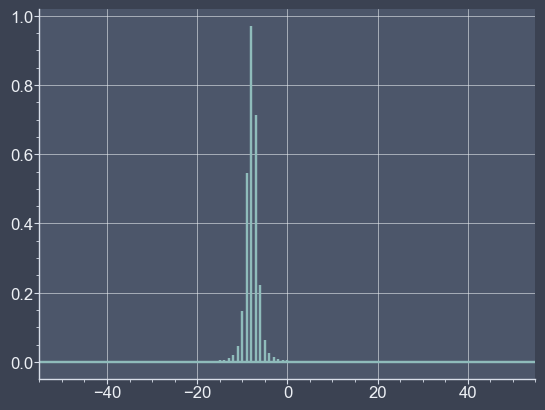

In [66]:
UNe_lag = plt.xcorr(UNe_spec_norm, UNe_spec_norm_new, maxlags = 50)
for x in range(len(UNe_lag[1])):
    if UNe_lag[1][x] == max(UNe_lag[1]):
        max_index = x
        
offset = UNe_lag[0][max_index]

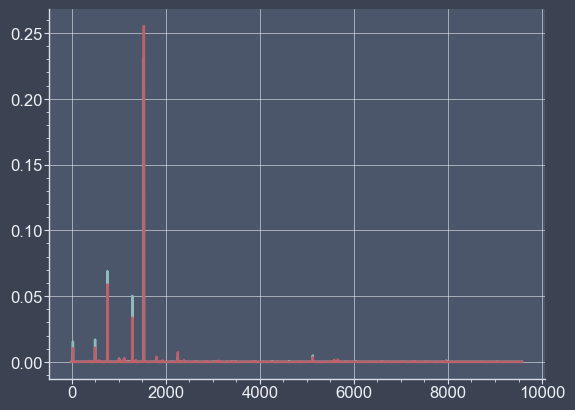

In [71]:
UNe_pix_new = UNe_pix + offset
plt.plot(UNe_pix_new, UNe_spec_norm_new)
plt.plot(UNe_pix, UNe_spec_norm)
# plt.xlim(1525, 1575)

In [ ]:
ThAr_spec = sf.make1D(ThAr_corrected)
ThAr_spec = np.flipud(ThAr_spec)
UNe_spec = sf.make1D(UNe_corrected)
UNe_spec = np.flipud(UNe_spec)

fig, ax = plt.subplots(1, 1, figsize = (6, 4))
ax.plot(ThAr_spec)
ax.set_title('ThAr (GS001) 1D Spectrum')
ax.set_xlabel('x Pixels')
ax.set_ylabel('Normalized Flux')
# plt.yscale('log')

# fig, ax = plt.subplots(1, 2, figsize = (12, 4))
# fig.suptitle('1D Spectra (GS001)')
# ax[0].plot(ThAr_spec)
# ax[0].set_title('ThAr')
xlim_0 = ax.get_xlim()
ylim_0 = ax.get_ylim()

# ax[1].plot(UNe_spec)
# ax[1].set_title('UNe')

def toggle_selector(event):
    if event.key == 'r':
        ax.set_xlim(0, width)
        ax.set_ylim(height, 0)
        fig.canvas.draw_idle()

def line_select_callback(eclick, erelease):
    x1, x2 = sorted([eclick.xdata, erelease.xdata])
    y1, y2 = sorted([erelease.ydata, eclick.ydata])
    ax.set_xlim(xlim_0)
    ax.set_ylim(ylim_0)
    fig.canvas.draw_idle()

rs = mpl.widgets.RectangleSelector(ax, line_select_callback, spancoords = 'data', interactive = True)
fig.canvas.mpl_connect('key_press_event', toggle_selector)

# fig.text(0.5, 0.02, 'Normalized Intensity', ha='center')
# fig.text(0.06, 0.5, 'x Pixels', va='center', rotation='vertical')

In [ ]:
ThAr_peak_locs, ThAr_peak_vals, ThAr_fw, ThAr_fwhm = sf.find_peaks(ThAr_spec)
UNe_peak_locs, UNe_peak_vals, UNe_fw, UNe_fwhm = sf.find_peaks(UNe_spec, 0.1)


fig, ax = plt.subplots(1, 2, figsize = (12,4))
fig.suptitle('1D Spectra with Peaks (GS001)')
ax[0].plot(ThAr_spec, label = 'spectrum')
ax[0].scatter(ThAr_peak_locs, ThAr_peak_vals, color = '#bf616a', label = 'peaks')
ax[0].set_title('ThAr')
ax[1].plot(UNe_spec, label = 'spectrum')
ax[1].scatter(UNe_peak_locs, UNe_peak_vals, color = '#bf616a', label = 'peaks')
ax[1].set_title('UNe')
ax[1].legend()
fig.text(0.5, 0.02, 'Normalized Intensity', ha='center')
fig.text(0.06, 0.5, 'x Pixels', va='center', rotation='vertical')
plt.show()

In [ ]:
ThAr_peak_props = np.array([ThAr_peak_locs, ThAr_peak_vals, ThAr_fw, ThAr_fwhm])
UNe_peak_props = np.array([UNe_peak_locs, UNe_peak_vals, UNe_fw, UNe_fwhm])
ThAr_peak_locs_clean, ThAr_peak_vals_clean, ThAr_fw_clean, ThAr_fwhm_clean = sf.clean_peaks(ThAr_peak_props)
UNe_peak_locs_clean, UNe_peak_vals_clean, UNe_fw_clean, UNe_fwhm_clean = sf.clean_peaks(UNe_peak_props)


fig, ax = plt.subplots(1, 2, figsize = (12,4))
fig.suptitle('1D Spectra with Peaks - Cleaned (GS001)')
ax[0].plot(ThAr_spec, label = 'spectrum')
ax[0].scatter(ThAr_peak_locs_clean, ThAr_peak_vals_clean, color = '#bf616a', label = 'peaks')
ax[0].set_title('ThAr')
# ax[0].set_xlim(6800, 7100)
ax[1].plot(UNe_spec, label = 'spectrum')
ax[1].scatter(UNe_peak_locs_clean, UNe_peak_vals_clean, color = '#bf616a', label = 'peaks')
ax[1].set_title('UNe')
ax[1].legend()
fig.text(0.5, 0.02, 'Normalized Intensity', ha='center')
fig.text(0.06, 0.5, 'x Pixels', va='center', rotation='vertical')

plt.show()

In [ ]:
ThAr_peak_props_clean = np.array([ThAr_peak_locs_clean, ThAr_peak_vals_clean, ThAr_fw_clean, ThAr_fwhm_clean])
UNe_peak_props_clean = np.array([UNe_peak_locs_clean, UNe_peak_vals_clean, UNe_fw_clean, UNe_fwhm_clean])

ThAr_pix = np.linspace(0, ThAr_spec.size - 1, ThAr_spec.size)
ThAr_centers, ThAr_res = sf.centroid(ThAr_spec, ThAr_pix, ThAr_peak_props_clean)
plt.show()

In [ ]:
UNe_pix = np.linspace(0, UNe_spec.size - 1, UNe_spec.size)
UNe_centers, UNe_res = sf.centroid(UNe_spec, UNe_pix, UNe_peak_props_clean)
plt.show()

In [ ]:
def wavesol(pix):
    a = -5.426e-11  
    b = -2.747e-07 
    c = 0.1342 
    d = 4810  
    wavelengths = a*pix**3 + b*pix**2 + c*pix + d
    return wavelengths

wavelength = wavesol(ThAr_pix)
wavelength = np.flipud(wavelength)
plt.figure(figsize = (12,4))
plt.plot(wavelength, ThAr_spec)
plt.xlabel('Wavelength (Å)')
plt.title('ThAr (GS001) Spectrum')
plt.ylabel('Normalized Flux')
plt.xlim(4800, 6030)
plt.ylim([0, 1])
plt.savefig('ThO_wavsol.png')

In [ ]:
f = 130
c = np.radians(33.4)
a = 0.5e-3
m = 1
theta_0 = np.radians(33.4)

full_width = ThAr_spec.size
center = full_width/2

x = np.linspace(0, full_width - 1, full_width)

h = 3.76e-3*(x - center)

y = (a/m)*(np.sin(np.arctan(h/f)+c) + np.sin(theta_0))
y = y*(10**7)

plt.plot(x,y)
plt.xlabel('pixels')
plt.ylabel('wavelengths (Angstroms)')

In [ ]:
plt.figure(figsize = (12, 4))
plt.plot(y, ThAr_spec)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('Normalized Flux')
# plt.xlim(5830, 5870)
plt.ylim(0,1)
plt.xlim(y[0], y[y.size - 1])
plt.title('ThAr Spectrum with Wavelength Solution')

In [ ]:
plt.figure(figsize = (12, 4))
plt.plot(y, UNe_spec)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('Normalized Flux')
# plt.xlim(5830, 5870)
plt.ylim(0,1)
plt.xlim(y[0], y[y.size - 1])
plt.title('UNe Spectrum with Wavelength Solution')